# Python Tutorial 04 - Plotting Data
## M. Virginia McSwain (Lehigh University; mcswain@lehigh.edu)

## Table of contents
* [Getting Started with a Simple Plot](#simple)
* [Options to Improve Your Plots](#options)
* [Advanced Plots: Histograms, Pie Charts, and Polar Coordinates](#advanced)
* [Even More Advanced Plots: Subplots](#subplots)
* [Further Plotting Tips](#further)
* [Practice Plotting](#practice)

One of the most important features of Python is that it combines computational power with visualization tools, so plotting your results is easy!  This tutorial will show you how to make several common types of plots and give you the power to make them look even more professional.

<a class="anchor" id="simple"></a>
## Getting Started with a Simple Plot

You can either use the **`pylab`** package (now obsolete?) or the newer **`matplotlib`** package to make nice plots using a Matlab-like syntax.  These packages can use either lists of numbers or numpy arrays to plot data.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

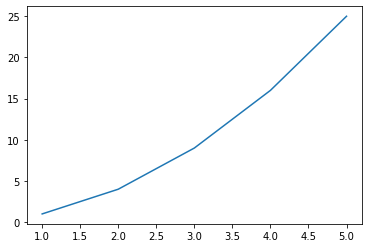

In [2]:
# Make lists of x and y values
x = [1,2,3,4,5]
y = [1,4,9,16,25]

# plot x and y
plt.plot(x,y)
plt.show()

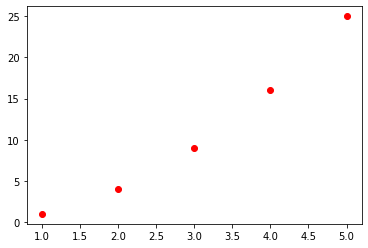

In [3]:
# Instead of the default blue line, plot x & y as red circles.  Better for discrete data points.
plt.plot(x,y,'ro')
plt.show()

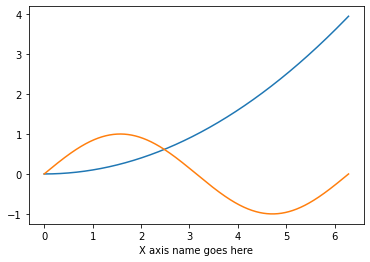

In [6]:
# Make smoother arrays of x and y values and include some mathematical functions
x = np.arange(0, 2*np.pi, 0.001)               # np.pi = the constant pi
y = x**2/10                                    # x**2 = x^2
y2 = np.sin(x)                                 # numpy's sin, cos, tan, etc. require input in radians (not degrees)

# plot y vs. x, y2 vs. x
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('X axis name goes here')
plt.show()

Note that your data can be in either a numerical list or numpy array format for the plot to work.  Numpy arrays are often preferred since you can do mathematical computations on a numpy array more easily than a list.

<a class="anchor" id="options"></a>
## Options to Improve Your Plots

* #### Change the line color: 

    The command

    ```
    plt.plot(x, y, 'r')
    ```

    plots a red line.  Other easy to use colors: blue (b), green (g), red (r), cyan (c), magenta (m), yellow (y), black (k), white (w).
    
    You can even select from dozens of additional "named colors" from <a href="https://matplotlib.org/3.1.0/gallery/color/named_colors.html">this list</a>.  If you want to get even deeper into the weeds, still more colors are available. 
    
    ```
    plt.plot(x, y, 'mediumspringgreen')
    ```


* #### Change the line style:

    Plot a dashed line:

    ```
    plt.plot(x, y, '--')
    ```

    Easy to use line styles: smooth line ('-'), dashed ('--'), dotted (':'), thick ('|'), dash-dot ('-.').



* #### Change the point symbol:

    Plot blue stars:

    ```
    plt.plot(x, y, 'b*')
    ```

    Easy to use symbols:  small dots (.), circle (o), square (s), pentagon (p), star (*), hexagon1 (h), hexagon2 (H), plus (+), cross (x), diamond (D), thin diamond (d).



* #### Axis labels and plot titles

    ```
    plt.xlabel('Name of x axis here')
    plt.ylabel('Name of y axis here')
    plt.title('Name of the plot')
    ```



* #### Axis ranges 

    ```
    plt.xlim(x_low, x_high)
    plt.ylim(y_low, y_high)
    ```
    
* #### Log scale for either axis

    ```
    plt.xscale('log')
    plt.yscale('log')
    ```


* #### Include a legend in your figure. 

    ```
    plt.plot(x1, y1, "-b", label="Label 1 text")
    plt.plot(x2, y2, "-r", label="Label 2 text")
    plt.legend(loc = "upper right")
    ```

    Other options for placement: ‘upper left’, ‘center’, ‘lower left’, ‘lower right’, ‘best’.
    
* #### Save figure to a file.  (Place this just before your ```plt.show()``` command.)

    ```
    plt.savefig('filename.pdf', transparent=True)
    ```
    

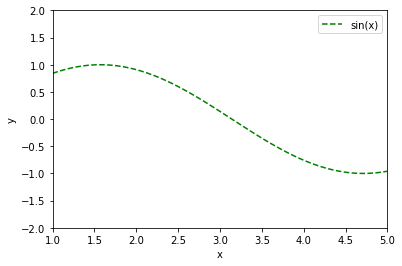

In [8]:
# Putting it all together
x = np.arange(0, 2*np.pi, 0.001)
y = np.sin(x)

plt.plot(x,y, 'g--', label='sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1, 5)
plt.ylim(-2, 2)
plt.legend(loc = "upper right")
#plt.savefig('example.pdf', transparent=True)   # uncomment if you want to save
plt.show()

<a class="anchor" id="advanced"></a>
## Advanced Plots

### Histograms

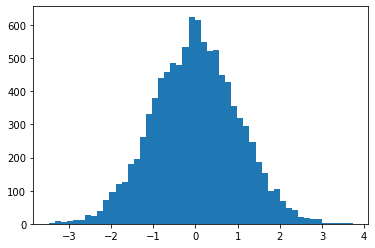

In [20]:
# Generate a Gaussian ("normal") distribution of random numbers
#np.random.seed(19680801)     # Use a random seed before calling x if you want to save the random numbers for later reproducibility
x = np.random.randn(10000)

# Plot the distribution of data (x) into 50 bins
histdata = plt.hist(x, 50)
plt.show()

**If you need to do further analysis of the histogram results**, you can retrieve the number of points in each bin (as shown above with the `yhist` variable).  The `xhist` variable contains the beginning and end points of each bin.  

Note that if there are `M` bins, the `xhist` array will contain `M+1` values but `yhist` will only contain `M` values.  (So if you need to plot `xhist` and `yhist` in a different format, you may need to drop one of the `xhist` values or calculate the bin midpoints.)

0.14437749672530176


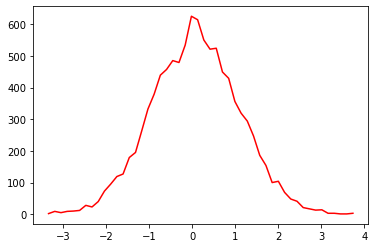

In [28]:
# retrieve the x & y data from your histogram
xhist = histdata[1]
yhist = histdata[0]
binwidth = np.mean(np.gradient(xhist))
print (binwidth)
xmidpoints = xhist[:-1]+binwidth

plt.plot(xmidpoints, yhist, 'r-')
plt.show()

### Pie Charts

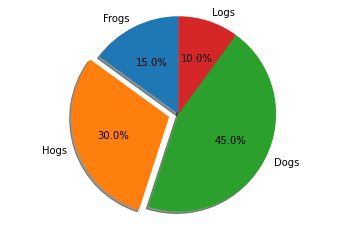

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
lab = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
ex = [0, 0.1, 0, 0]  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=ex, labels=lab, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Polar Coordinates

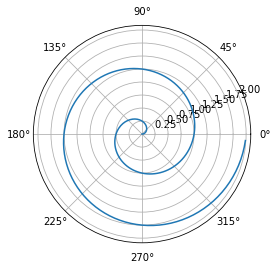

In [13]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

plt.polar(theta, r) 
plt.show()

For a bit more control over the appearance of your polar plots, you can use additional settings in ```plt``` to set (for example) the axis ranges.  

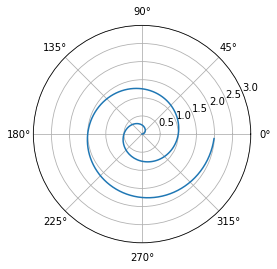

In [14]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

plt.axes(polar=True)
plt.axis([0, 2*np.pi, 0, 3])    # Set polar axis limits [min theta, max theta, min r, max r]
plt.polar(theta, r) 
#plt.scatter(theta, r)          # also works
plt.show()

<a class="anchor" id="subplots"></a>
## Even More Advanced Plots: Subplots

The ```subplot``` option allows you to stack more than one plot on a single figure.  

When calling ```subplot```, you usually include 3 numbers:
* The number of vertical plots (*nrows*)
* The number of horizontal plots (*ncols*)
* The position (*index*) of the current plot

If *nrows*, *ncols* and *index* are all less than 10, they can also be given as a single, concatenated, three-digit number.  Thus the following calling sequences are identical:

```
plt.subplot(211)
plt.subplot(2, 1, 1)
```

Note that there is an alternate function called ```subplots``` in the matplotlib package.  Its usage is subtly different than ```subplot```. 

A simple example with 2 subplots stacked vertically:

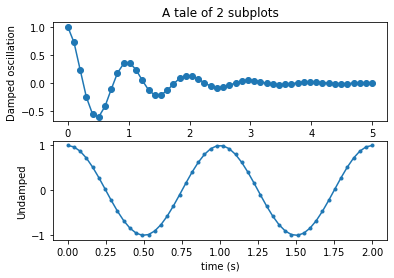

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

Make 3 subplots, also stacked vertically, that share the same x and/or y axes:

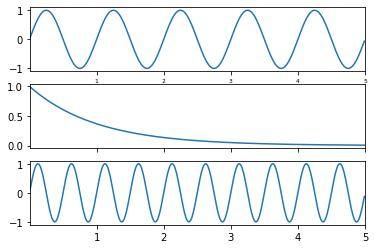

In [16]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x axis only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y axes
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

Let's get crazy and make subplots of different sizes and plot types:

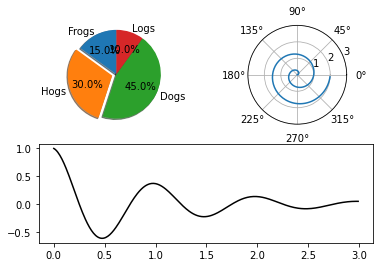

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# Pie chart in upper left
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax1 = plt.subplot(221)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Polar coordinates in upper right
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax2 = plt.subplot(222, polar=True)
ax2.axis([0, 2*np.pi, 0, 3])    # Set polar axis limits [min theta, max theta, min r, max r]
ax2.plot(theta, r) 


# Black curve along bottom
t1 = np.arange(0.0, 3.0, 0.01)
f1 = np.exp(-t1) * np.cos(2*np.pi*t1)

ax3 = plt.subplot(212)
ax3.plot(t1, f1, 'k')


plt.show()

<a class="anchor" id="further"></a>
## Further Plotting Tips

For a complete list of options in the matplotlib package, type 

```
plt.get_plot_commands()
```

For a full description of each option, type (for example)

```
help(plt.hist)    
```

See <a href="https://matplotlib.org/gallery/index.html">the Matplotlib Gallery</a> for many more plotting examples.

<a class="anchor" id="practice"></a>
## Practice Plotting

### Blackbody Function

Use the partial block of code below to plot the Planck (blackbody) spectra for T = 5000 K, 10000 K, and 15000 K over the range $1000 \; Angstroms < \lambda < 10,000 \; Angstroms$.  Include a legend that identifies the 3 curves. 

$$ B_\lambda (T) = \frac{ 2 h c^2 / \lambda^5 }{e^{hc/\lambda k_B T} - 1}  $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Don't call your wavelength variable "lambda" since lambda is also a Python command
w = np.arange(1000, 10000, 1)*1.e-10

# fundamental constants in SI units
h = 6.62607e-34
c = 2.99792e8
k_B = 1.38065e-23

T1 = 5000.

# Finish the Planck function below and make your plots!
np.exp(h*c/w/k_B/T1)        
